In [12]:
import os
os.chdir('../')
from gravity import Gravity, Production, Attraction, Doubly
os.chdir('/Users/toshan/dev/pysal/pysal/contrib/spint')
import entropy as grav
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import geopandas as gp
os.chdir('/Users/toshan/Dropbox/Data/NYC_BIKES')
import matplotlib.pylab as plt
%pylab inline
from descartes import PolygonPatch
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import pyproj as pj
from shapely.geometry import Polygon, Point



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
ct = pd.read_csv('CT_BIKE_DATA.csv')
ct = ct[ct['o_tract'] != ct['d_tract']]

ct.ix[ct.o_sq_foot == 0, 'o_sq_foot'] = 1
ct.ix[ct.d_sq_foot == 0, 'd_sq_foot'] = 1
ct.ix[ct.o_cap == 0, 'o_cap'] = 1
ct.ix[ct.d_cap == 0, 'd_cap'] = 1
ct.ix[ct.o_housing == 0, 'o_housing'] = 1
ct.ix[ct.d_housing == 0, 'd_housing'] = 1

flows = ct['count'].values.reshape((-1,1))
o_vars = np.hstack([ct['o_sq_foot'].values.reshape((-1,1)), ct['o_housing'].values.reshape((-1,1)), ct['o_cap'].values.reshape((-1,1))])
d_vars = np.hstack([ct['d_sq_foot'].values.reshape((-1,1)), ct['d_housing'].values.reshape((-1,1)), ct['d_cap'].values.reshape((-1,1))])
cost = ct['tripduration'].values.reshape((-1,1))
o = ct['o_tract'].astype(str).values.reshape((-1,1))
d = ct['d_tract'].astype(str).values.reshape((-1,1))
print len(ct), ' OD pairs between census tracts after filtering out intrazonal flows'
ct.head()


14042  OD pairs between census tracts after filtering out intrazonal flows


,Unnamed: 0,count,d_cap,d_tract,distance,end station latitude,end station longitude,o_cap,o_tract,tripduration,...,d_sq_foot,diffs_out,start,end,weighted,total_out,total_in,o_hub,d_hub,od_hub
0,0,5709,255,600,NaN,40.712899,-73.989865,162,202,474.173605,...,59149181.752643,28553756,202,600,0,56352,69165,hub,hub,hub
1,1,4010,595,600,NaN,40.712899,-73.989865,774,700,765.920864,...,59149181.752643,28553756,700,600,0,160040,69165,hub,hub,hub
2,2,1906,170,600,NaN,40.712899,-73.989865,141,800,395.842085,...,59149181.752643,28553756,800,600,0,34254,69165,hub,hub,non_hub
3,3,1192,255,600,NaN,40.712899,-73.989865,291,900,882.062412,...,59149181.752643,28553756,900,600,0,46446,69165,hub,hub,non_hub
4,4,484,85,600,NaN,40.712899,-73.989865,57,1002,767.284951,...,59149181.752643,28553756,1002,600,0,15916,69165,hub,hub,non_hub


In [15]:
os.chdir('/Users/toshan/dev/pysal/pysal/contrib/spint')
from gravity import Gravity, Production, Attraction, Doubly

model = Gravity(flows, o_vars, d_vars, cost, 'exp')
print model.params
print model.deviance

[ 0.09898099  0.05748786  0.50319944  0.06920194  0.06408526  0.39371417
 -0.00226671]
3289243.68953


In [16]:
model = Production(flows, o, d_vars, cost, 'exp')
print model.params[-4:]
print model.deviance

[ 0.00437122  0.06794379  0.85720958 -0.00227555]
2383227.55076


In [18]:
model = Doubly(flows, o, d, cost, 'exp')
print model.params[-1]
print model.deviance

-0.00232112445583
1444734.46276


In [68]:
model = Production(flows, o, d_vars, cost, 'exp')
local = model.local()

In [70]:
local['param4'][:10]

[-0.0017795992298777902,
 -0.0026156676327248746,
 -0.0022363993586345388,
 -0.00194947666943137,
 -0.0017071540350527339,
 -0.0019515685319320963,
 -0.0016810426792857047,
 -0.0017657944972518311,
 -0.0020341925723913884,
 -0.0015759200833807205]

In [81]:
model.params[-1:] - local['param4']

array([ -4.95948156e-04,   3.40120247e-04,  -3.91480275e-05,
        -3.26070717e-04,  -5.68393351e-04,  -3.23978854e-04,
        -5.94504707e-04,  -5.09752889e-04,  -2.41354814e-04,
        -6.99627303e-04,  -6.06703481e-04,  -2.87165103e-04,
        -2.06833527e-04,  -7.12588916e-04,   5.04928141e-06,
         5.34234751e-04,  -1.23411275e-04,  -1.59568001e-04,
        -2.96358867e-04,  -8.13853592e-04,  -5.58786311e-04,
        -1.53686724e-04,   1.52269287e-04,  -5.62449153e-04,
        -4.99537030e-04,  -1.98040148e-04,   9.82797486e-04,
        -8.67929860e-04,  -5.27493938e-04,  -9.24817442e-04,
        -2.45312465e-04,  -1.16812380e-04,  -1.02053526e-03,
         1.67786401e-04,   3.41493881e-04,   4.59007938e-04,
         8.02955033e-04,   2.43489411e-04,   1.10776816e-03,
         8.55636181e-04,  -1.29914342e-04,   5.03848977e-04,
         8.70868120e-04,   5.28052058e-04,   1.09964551e-03,
         2.88481182e-04,   3.95290078e-04,   7.13678425e-04,
         6.20446122e-05,

In [60]:
crs = {'datum':'WGS84', 'proj':'longlat'}
tracts = gp.read_file('/Users/toshan/Dropbox/Data/NYC_BIKES/nyct2010_15a/nyct2010.shp')
tracts = tracts.to_crs(crs=crs)
man_tracts = tracts[tracts['BoroCode'] == '1'].copy()
man_tracts['CT2010S'] = man_tracts['CT2010'].astype(int).astype(str)
mt = set(man_tracts.CT2010S.unique())
lt = set(np.unique(o))
nt = list(mt.difference(lt))
no_tracts = pd.DataFrame({'no_tract':nt})
no_tracts = man_tracts[man_tracts.CT2010S.isin(nt)].copy()
local_vals = pd.DataFrame({'betas': local['param4'], 'tract':np.unique(o)})
local_vals = pd.merge(local_vals, man_tracts[['CT2010S', 'geometry']], left_on='tract', right_on='CT2010S')
local_vals = gp.GeoDataFrame(local_vals)



(40.7, 40.78)

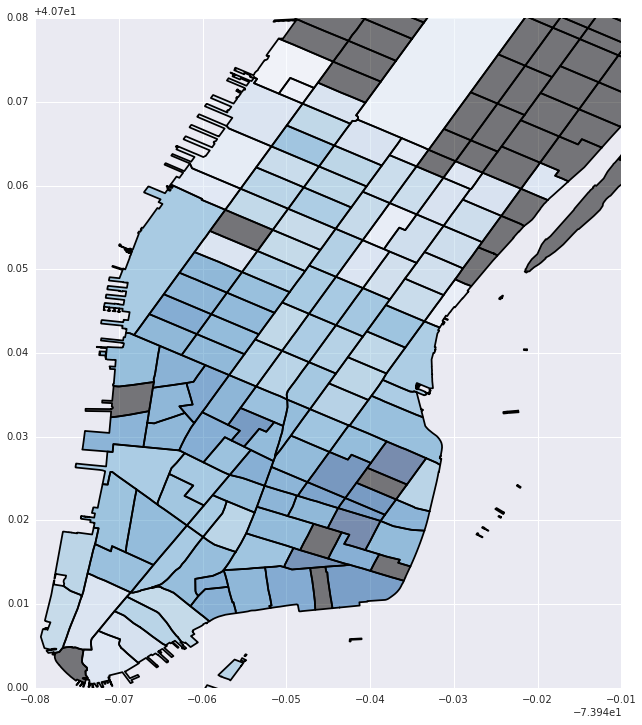

In [61]:
plt.figure(figsize=(12,12))
local_vals['inv_betas'] = (local_vals['betas']*-1)
no_tracts['test'] = 0
no_tracts.plot('test', colormap='copper')
local_vals.plot('inv_betas', colormap='Blues')
plt.xlim(-74.02, -73.95)
plt.ylim(40.7, 40.78)

(40.7, 40.78)

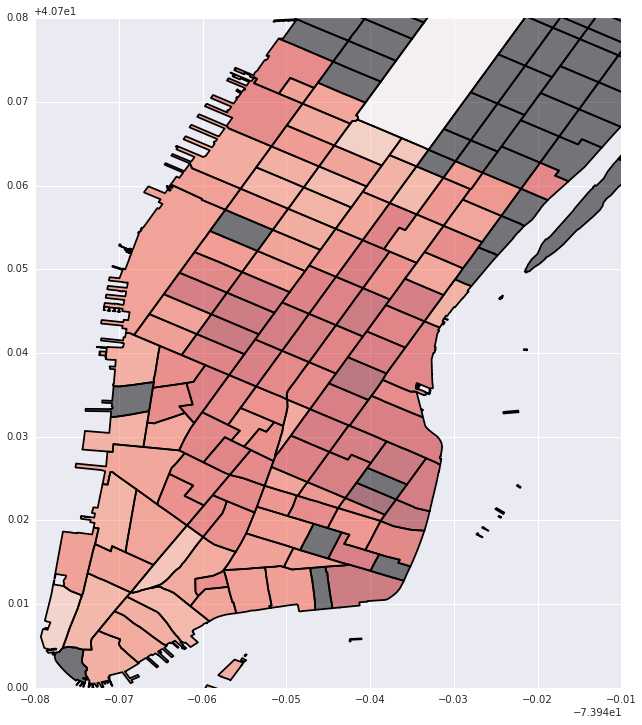

In [62]:
plt.figure(figsize=(12,12))
local_vals['cap'] = local['param3']
no_tracts['test'] = 0
no_tracts.plot('test', colormap='copper')
local_vals.plot('cap', colormap='Reds')
plt.legend()
plt.xlim(-74.02, -73.95)
plt.ylim(40.7, 40.78)

(40.7, 40.78)

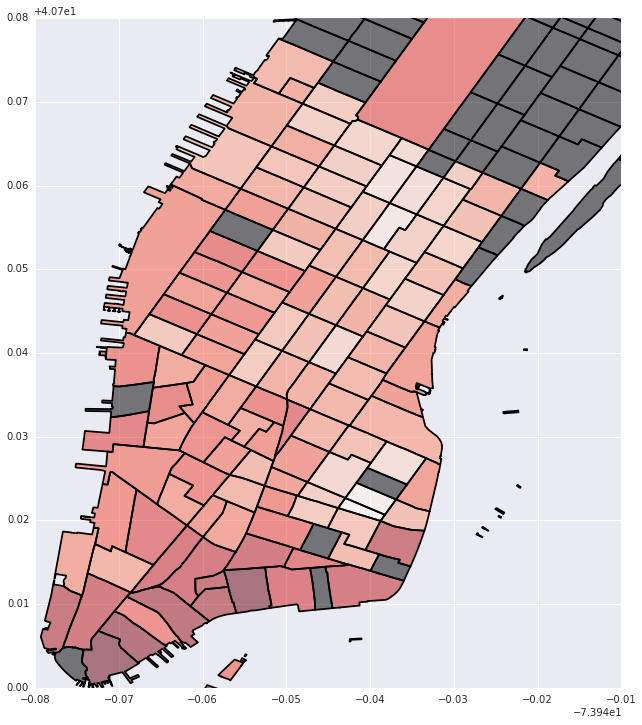

In [63]:
plt.figure(figsize=(12,12))
local_vals['house'] = local['param2']
no_tracts['test'] = 0
no_tracts.plot('test', colormap='copper')
local_vals.plot('house', colormap='Reds')
plt.legend()
plt.xlim(-74.02, -73.95)
plt.ylim(40.7, 40.78)

(40.7, 40.78)

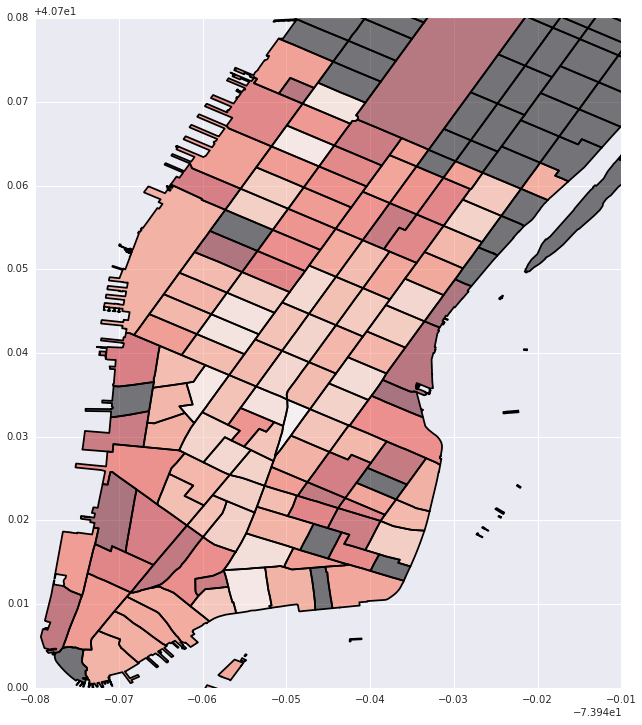

In [64]:
plt.figure(figsize=(12,12))
local_vals['foot'] = local['param1']
no_tracts['test'] = 0
no_tracts.plot('test', colormap='copper')
local_vals.plot('foot', colormap='Reds')
plt.legend()
plt.xlim(-74.02, -73.95)
plt.ylim(40.7, 40.78)